# #####       				Exercice 2 (8 points)		    	 	#####

Telecharger les donnees digits depuis le repo UCI Machine Learning ?
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, SpectralClustering

In [2]:
train = pd.read_csv('optdigits.tra')
test = pd.read_csv('optdigits.tes')

In [6]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]
print(len(X_train),len(y_train),len(X_test),len(y_test))

3822 3822 1796 1796


Q : Afficher une image quelconque, par ex l'obs dont l'index est n°2 dans le train en indiquant comme titre de l'image son label ? (0.5 pt)



Text(0.5, 1.0, 'chiffre 2')

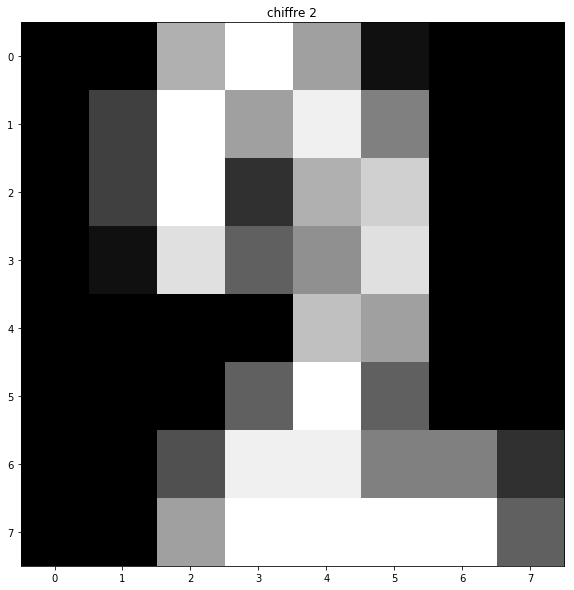

In [14]:
obs = 4
plt.figure(figsize=(15,10))
image = X_train.iloc[obs].values.reshape((8, 8))
plt.gray()
plt.imshow(image)
plt.title('chiffre {}'.format(y_train[obs]))

Q : A l'aide d'une boucle for, afficher les 9 1e images qui correspondent au chiffre 7 (pr visualiser les differentes façons d'ecrire 7) ? Placer ces images dans une même figure ? (1 pt)


In [26]:
l_7 = X_train[y_train==7].index.tolist()[0:9]

print(l_7)

[1, 9, 16, 19, 29, 31, 50, 59, 69]


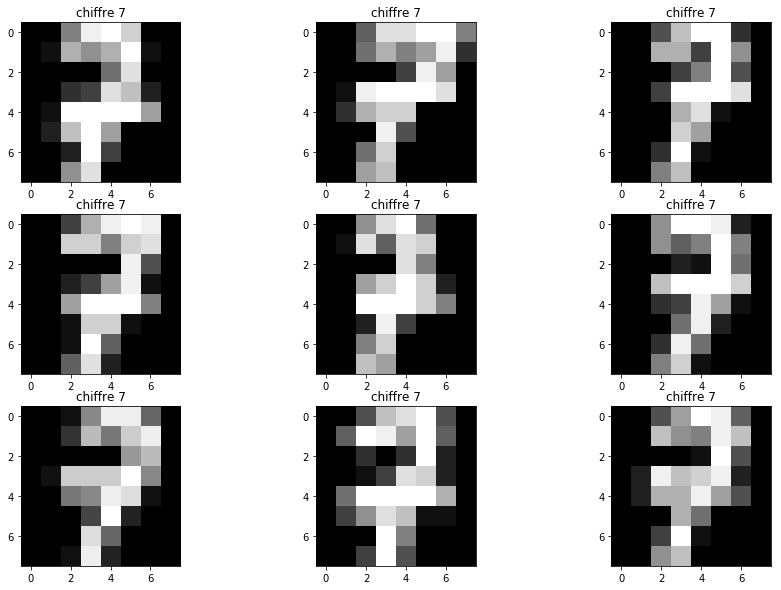

In [27]:

plt.figure(figsize=(15,10))
plt.title("les premieres images de chaque chiffre dans le dataset")
for i, val in enumerate(l_7):
    plt.subplot(3,3, i+1)
    image = X_train.iloc[val].values.reshape((8, 8))
    plt.gray()
    plt.imshow(image)
    plt.title('chiffre {}'.format(y_train[val]))

Q : Generaliser la boucle precedente pr afficher les 9 1e images de chaque classe ? Penser à placer les 9 images de chaque classe dans des figures différentes ? (1 pt)


In [28]:
chiffres = []

for i in range(10):
    x = X_train[y_train==i].index.tolist()[0:9]
    chiffres.append(x)

In [32]:
chiffres

[[0, 7, 14, 25, 30, 55, 61, 71, 94],
 [10, 23, 27, 34, 41, 51, 60, 68, 77],
 [4, 24, 40, 47, 49, 54, 62, 63, 65],
 [13, 36, 46, 58, 70, 72, 73, 78, 79],
 [2, 15, 18, 38, 45, 52, 56, 66, 80],
 [5, 6, 12, 21, 64, 105, 114, 116, 118],
 [3, 26, 32, 44, 53, 57, 91, 97, 110],
 [1, 9, 16, 19, 29, 31, 50, 59, 69],
 [8, 17, 20, 28, 48, 67, 84, 85, 87],
 [11, 22, 33, 35, 37, 39, 42, 43, 76]]

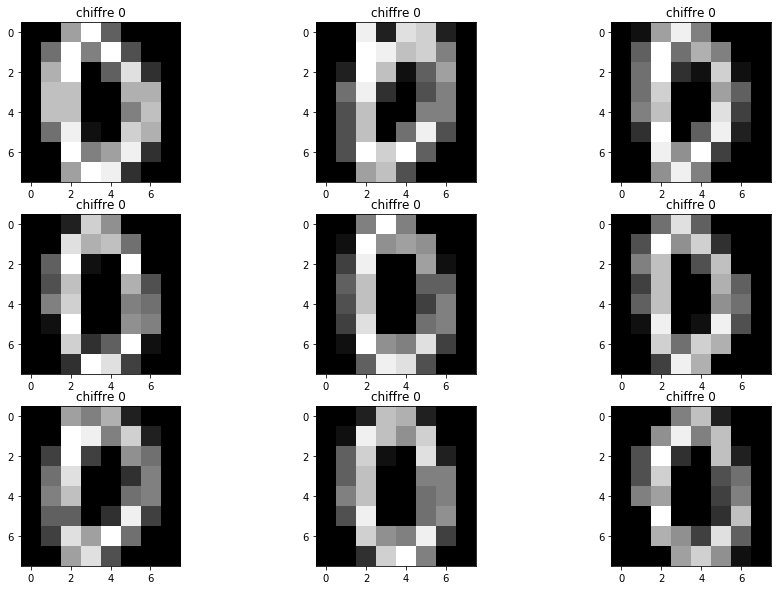

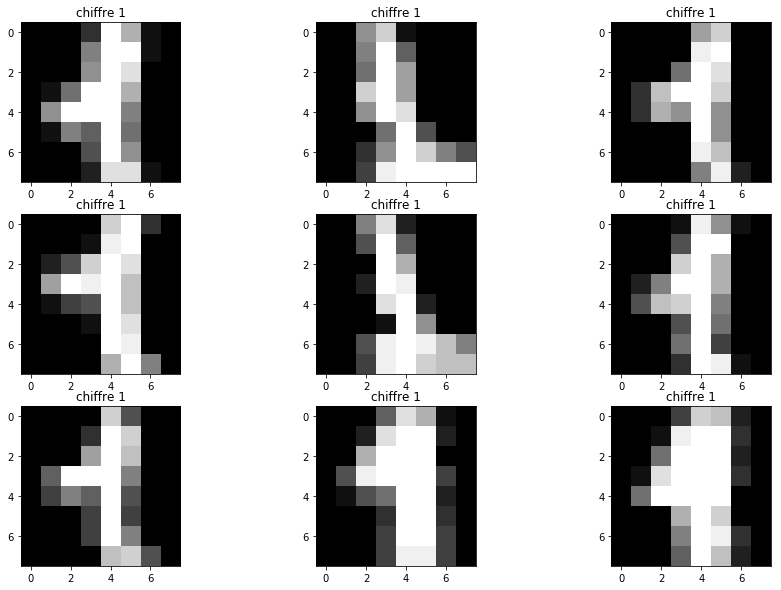

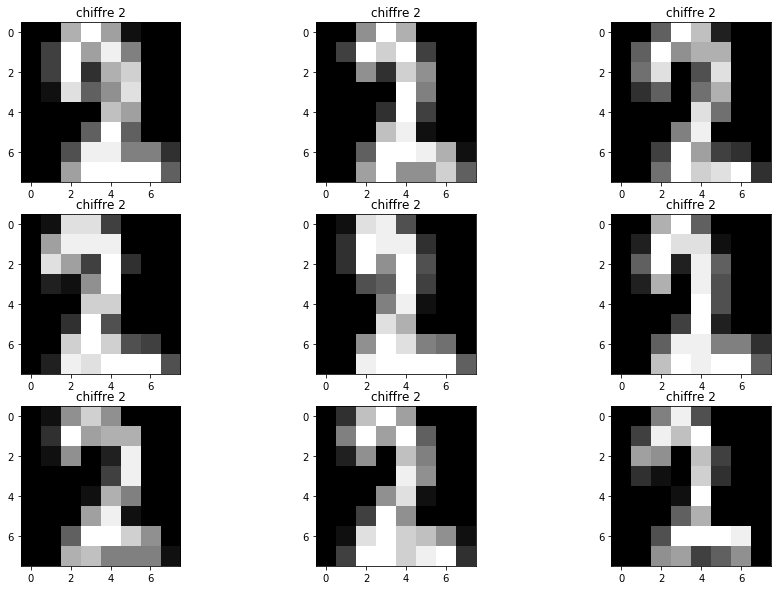

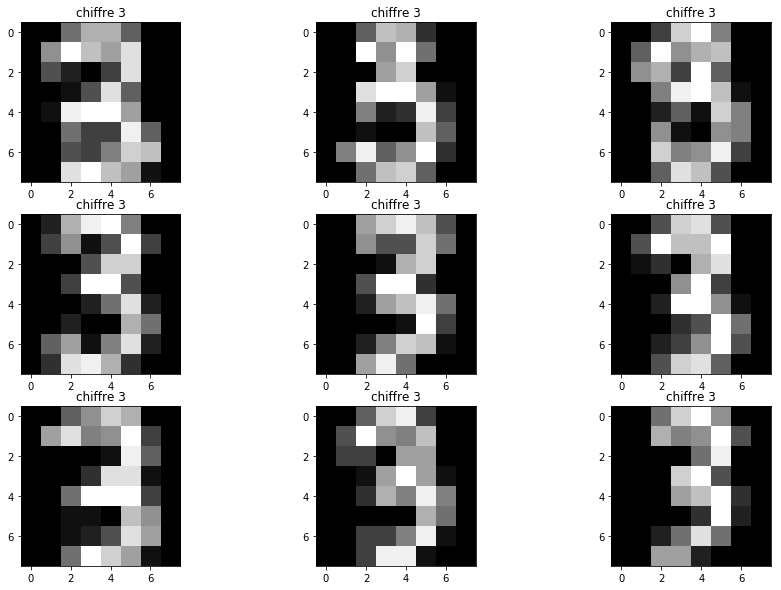

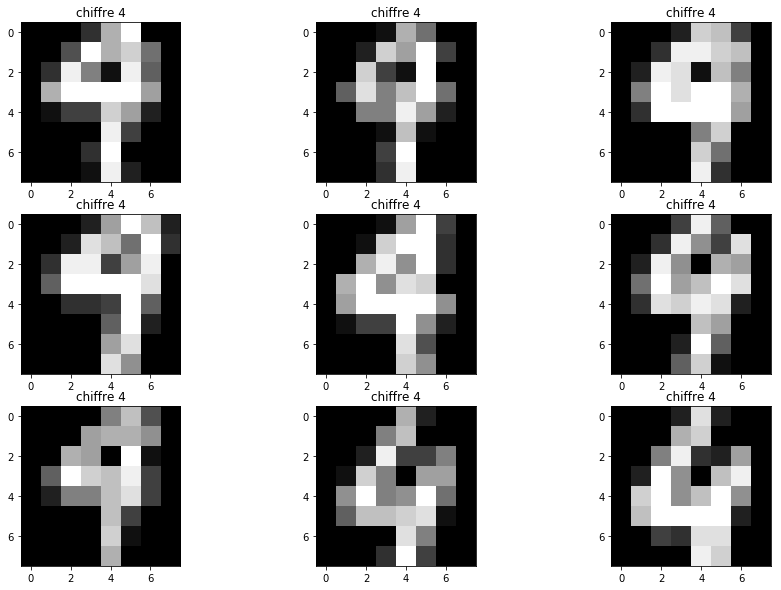

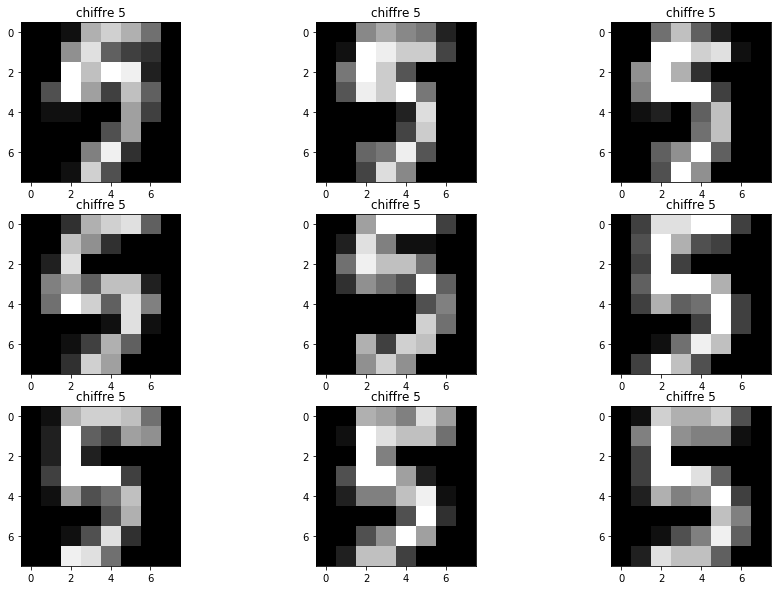

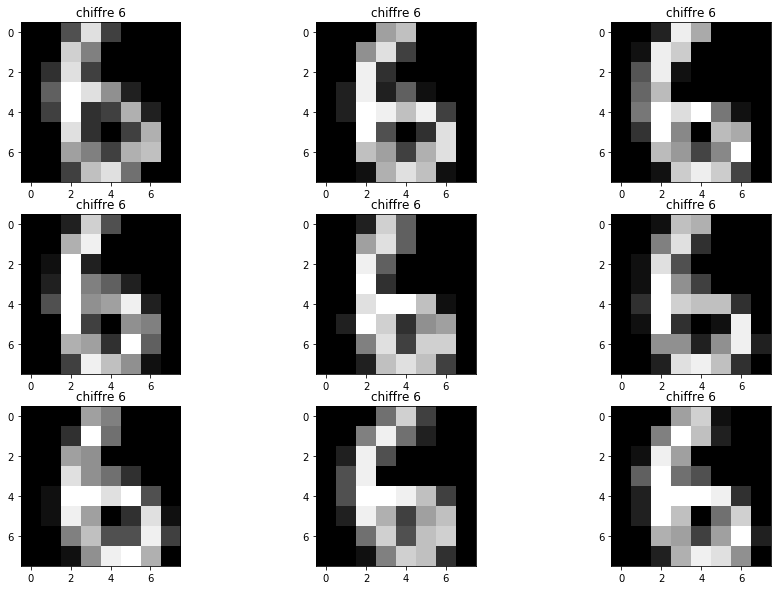

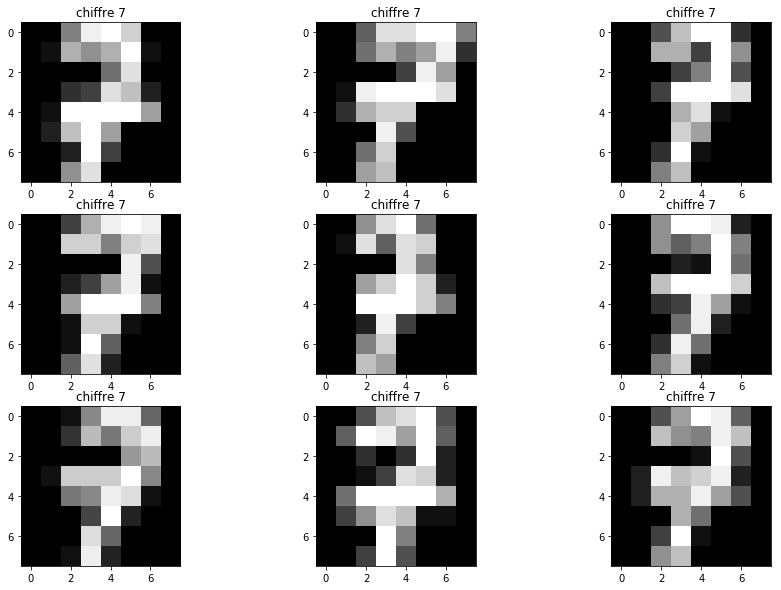

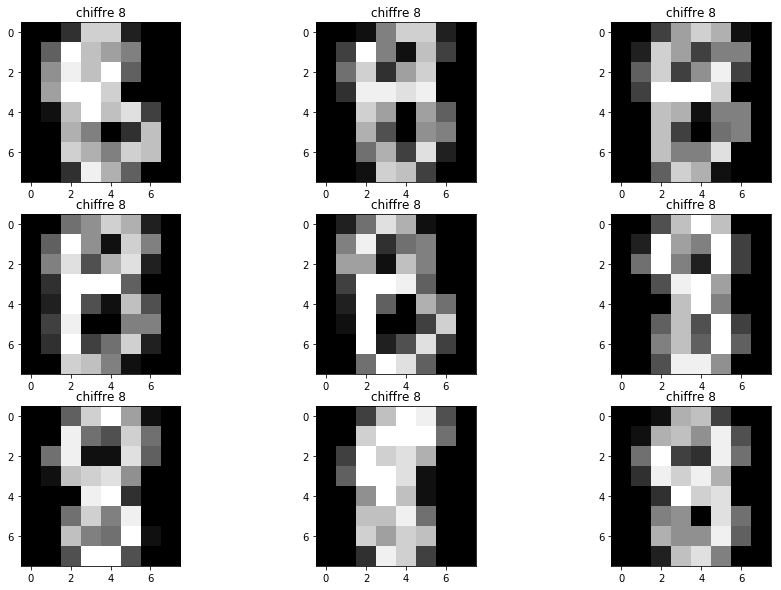

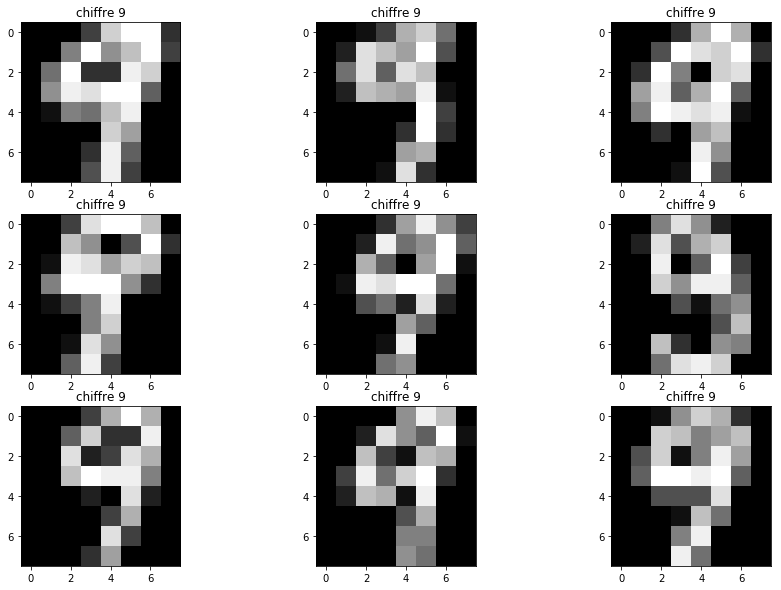

In [33]:
for j in range(10):
    plt.figure(figsize=(15,10))
    plt.title("les premieres images de chaque chiffre dans le dataset")
    for i, val in enumerate(chiffres[j]):
        plt.subplot(3,3, i+1)
        image = X_train.iloc[val].values.reshape((8, 8))
        plt.gray()
        plt.imshow(image)
        plt.title('chiffre {}'.format(y_train[val]))

Q : Vu l'heterogeneite des façons d'ecrire le chiffre 7, afficher une image "moyenne" qui represente le chiffre 7 ("portrait robot") ? (1 pt)


Text(0.5, 1.0, 'chiffre 7')

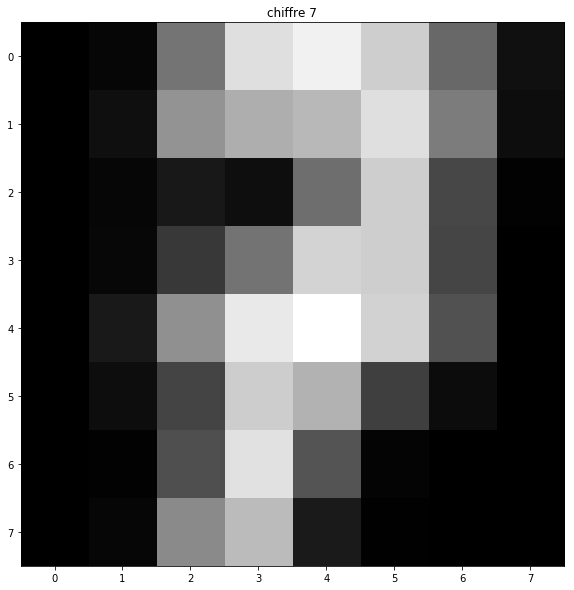

In [36]:
chiffre = 7
l_7 = X_train[y_train==chiffre]
l7 = l_7.mean(axis=0)    


plt.figure(figsize=(15,10))
image = l7.values.reshape((8, 8))
plt.gray()
plt.imshow(image)
plt.title('chiffre {}'.format(chiffre))

Q : Afficher une image "moyenne" de chaque chiffre (sur une même figure) ? (1 pt)


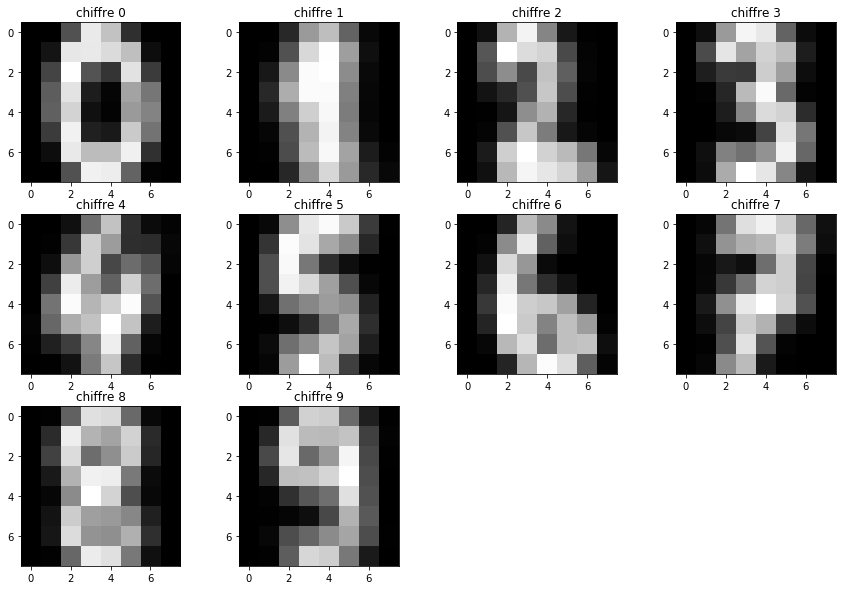

In [37]:
k= []
for i in range(10):
    x = X_train[y_train==i]
    arr = x.mean(axis=0)    
    k.append(arr)

plt.figure(figsize=(15,10))
plt.title("la moyenne des écritures de chaque chiffre")
for i, val in enumerate(k):
    plt.subplot(3,4, i+1)
    image = k[i].values.reshape((8, 8))
    plt.gray()
    plt.imshow(image)
    plt.title('chiffre {}'.format(i))

Q : Fusionner le train et le test en un seul jeu de données ? (1 pt)


In [40]:
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

In [43]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [44]:
from sklearn.preprocessing import scale, StandardScaler

X = scale(X)
y = scale(y)

Q : Appliquer k-means sur le jeu de données entier avec k = 10 ? (1 pt)


In [45]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

tsne = TSNE(n_components=2, random_state=0, n_iter=300, metric='euclidean')
tsne_results = tsne.fit_transform(X)

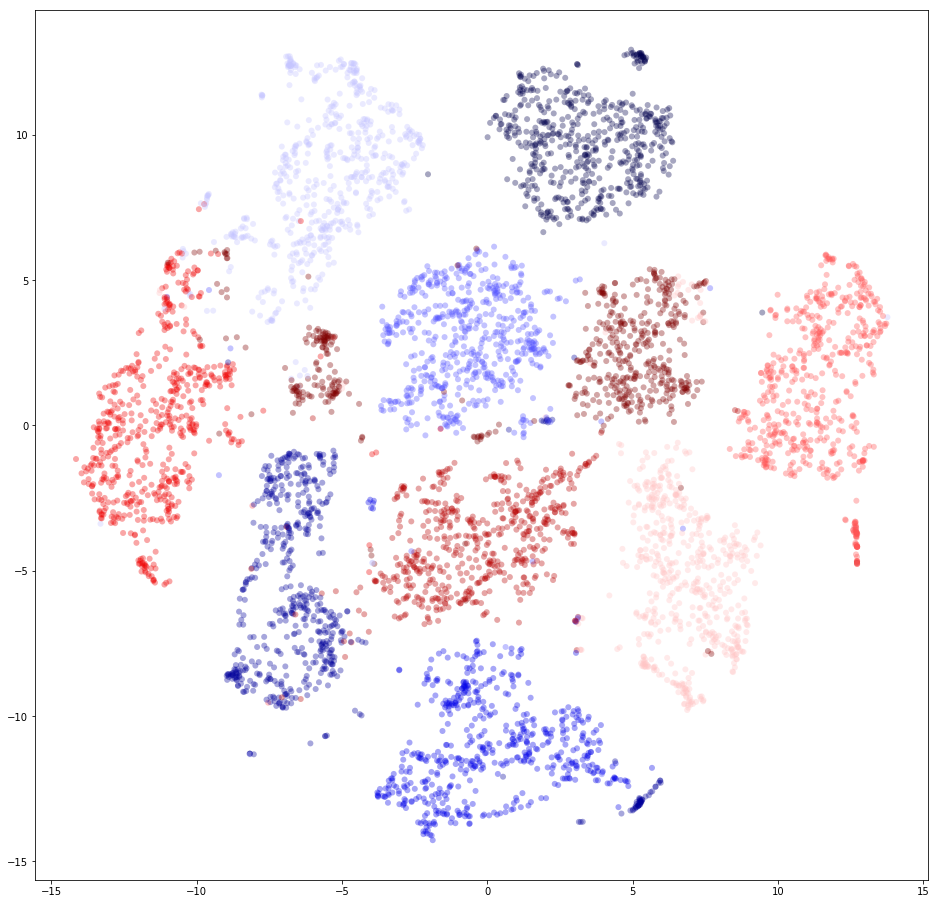

In [47]:
plt.figure(figsize=(16,16))
plt.scatter(tsne_results[:,0], tsne_results[:,1] , c=y, cmap = "seismic", edgecolor = "None", alpha=0.35)

In [48]:
from sklearn.cluster import KMeans
# Run local implementation of kmeans
km = KMeans(n_clusters=10)
km.fit(tsne_results)
y_pred = km.fit_predict(tsne_results)

centroids = km.cluster_centers_
labs = km.labels_
print(np.unique(labs))

[0 1 2 3 4 5 6 7 8 9]


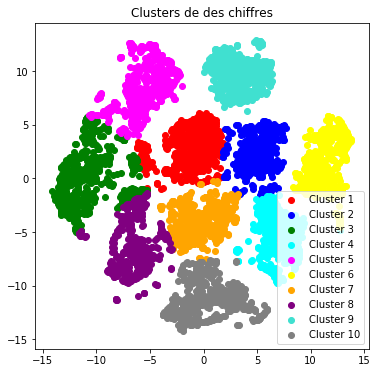

In [52]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))

# Visualiser les résultats
plt.scatter(tsne_results[labs == 1, 0], tsne_results[labs == 1, 1], c = 'red', label = 'Cluster 1')
plt.scatter(tsne_results[labs == 2, 0], tsne_results[labs == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(tsne_results[labs == 3, 0], tsne_results[labs == 3, 1], c = 'green', label = 'Cluster 3')
plt.scatter(tsne_results[labs == 4, 0], tsne_results[labs == 4, 1], c = 'cyan', label = 'Cluster 4')
plt.scatter(tsne_results[labs == 5, 0], tsne_results[labs == 5, 1], c = 'magenta', label = 'Cluster 5')
plt.scatter(tsne_results[labs == 6, 0], tsne_results[labs == 6, 1], c = 'yellow', label = 'Cluster 6')
plt.scatter(tsne_results[labs == 7, 0], tsne_results[labs == 7, 1], c = 'orange', label = 'Cluster 7')
plt.scatter(tsne_results[labs == 8, 0], tsne_results[labs == 8, 1], c = 'purple', label = 'Cluster 8')
plt.scatter(tsne_results[labs == 9, 0], tsne_results[labs == 9, 1], c = 'Turquoise', label = 'Cluster 9')
plt.scatter(tsne_results[labs == 0, 0], tsne_results[labs == 0, 1], c = 'Gray', label = 'Cluster 10')

plt.title('Clusters de des chiffres')
plt.legend()
ax.set_aspect('equal')

Q : Afficher l'image correspondante à chaque centroïde de chaque cluster (sur une même figure) ? (1 pt)


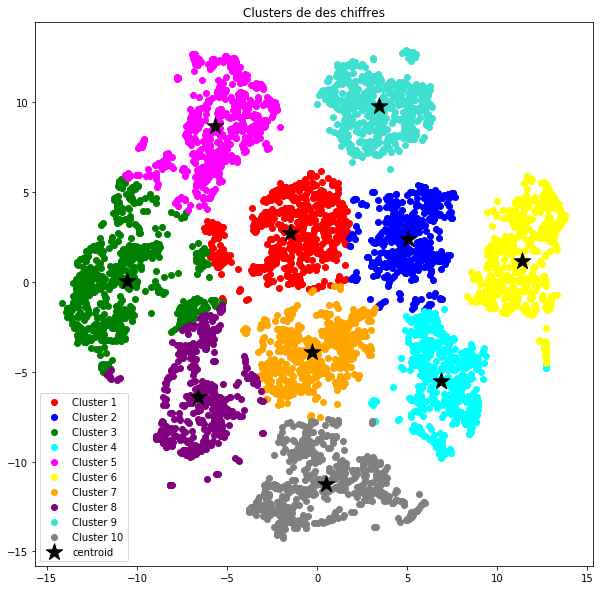

In [55]:
# Plot the clustered data
plt.subplots(figsize=(10, 10))

# Visualiser les résultats
plt.scatter(tsne_results[labs == 1, 0], tsne_results[labs == 1, 1], c = 'red', label = 'Cluster 1')
plt.scatter(tsne_results[labs == 2, 0], tsne_results[labs == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(tsne_results[labs == 3, 0], tsne_results[labs == 3, 1], c = 'green', label = 'Cluster 3')
plt.scatter(tsne_results[labs == 4, 0], tsne_results[labs == 4, 1], c = 'cyan', label = 'Cluster 4')
plt.scatter(tsne_results[labs == 5, 0], tsne_results[labs == 5, 1], c = 'magenta', label = 'Cluster 5')
plt.scatter(tsne_results[labs == 6, 0], tsne_results[labs == 6, 1], c = 'yellow', label = 'Cluster 6')
plt.scatter(tsne_results[labs == 7, 0], tsne_results[labs == 7, 1], c = 'orange', label = 'Cluster 7')
plt.scatter(tsne_results[labs == 8, 0], tsne_results[labs == 8, 1], c = 'purple', label = 'Cluster 8')
plt.scatter(tsne_results[labs == 9, 0], tsne_results[labs == 9, 1], c = 'Turquoise', label = 'Cluster 9')
plt.scatter(tsne_results[labs == 0, 0], tsne_results[labs == 0, 1], c = 'Gray', label = 'Cluster 10')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='black', label='centroid')

plt.title('Clusters de des chiffres')
plt.legend()
ax.set_aspect('equal')


Q : Est-ce que le k-means arrive bien à créer les 10 classes des chiffres ? (0.5 pt)


In [57]:
from sklearn import metrics
def evaluate_kmeans(y, y_preds):
    print("with {} we have {} error rate".format("homogeneity_score", round(1-metrics.homogeneity_score(y, y_preds),2)))
    print("with {} we have {} error rate".format("completeness_score", round(1-metrics.completeness_score(y, y_preds),2)))
    print("with {} we have {} error rate".format("v_measure_score",round( 1-metrics.v_measure_score(y, y_preds),2)))
    print("with {} we have {} error rate".format("adjusted_rand_score", round(1-metrics.adjusted_rand_score(y, y_preds),2)))
    print("with {} we have {} error rate".format("adjusted_mutual_info_score", round(1-metrics.adjusted_mutual_info_score(y,  y_preds),2)))

evaluate_kmeans(y, labs)

with homogeneity_score we have 0.16 error rate
with completeness_score we have 0.15 error rate
with v_measure_score we have 0.16 error rate
with adjusted_rand_score we have 0.19 error rate
with adjusted_mutual_info_score we have 0.16 error rate
